In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


<AxesSubplot:xlabel='Drug', ylabel='Count'>

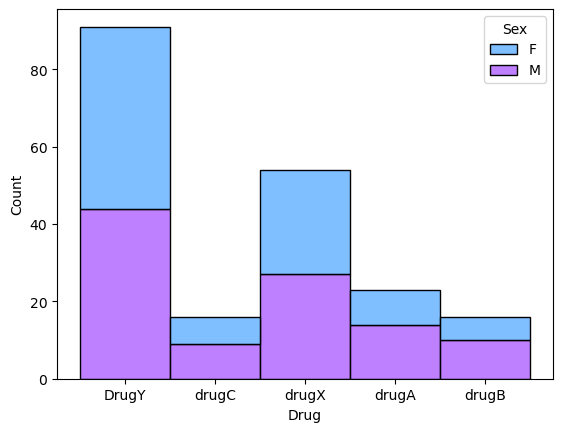

In [8]:
sns.histplot(x='Drug',hue=df['Sex'],multiple='stack',palette='cool',data=df)

In [9]:
def pie_graph(col):
    cname=df[col].value_counts()
    plt.pie(cname,autopct='%.2f%%',shadow=True,radius=1,startangle=70,textprops={'fontsize':15})
    plt.title(col,color='red')
    plt.legend(cname.index,loc='best')
    plt.show();

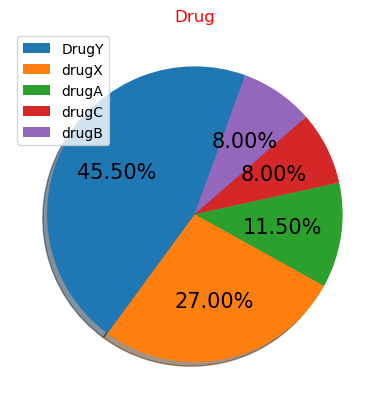

In [10]:
pie_graph('Drug')

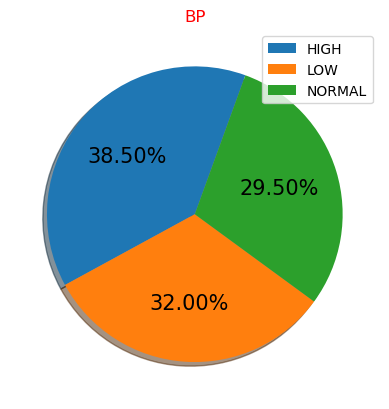

In [11]:
pie_graph('BP')

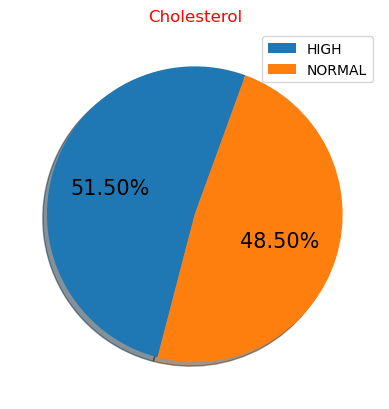

In [12]:
pie_graph('Cholesterol')

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

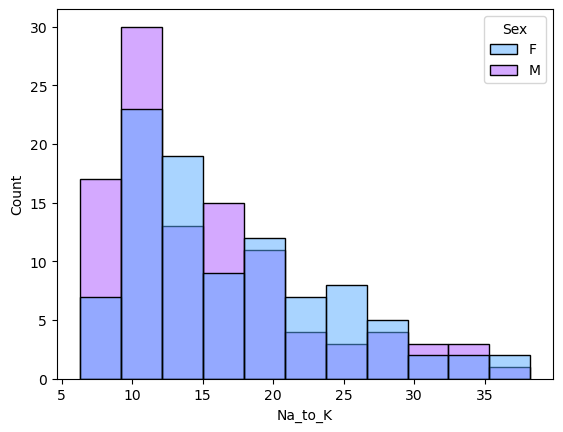

In [13]:
sns.histplot(x=df['Na_to_K'],hue=df['Sex'],palette='cool')

In [14]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [15]:
def hist_plot(col):
    sns.histplot(x=df[col],hue=df['Drug'],palette='cool',kde=True)

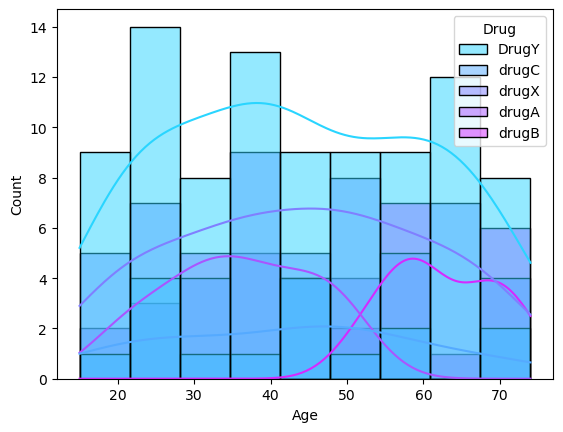

In [16]:
hist_plot('Age')

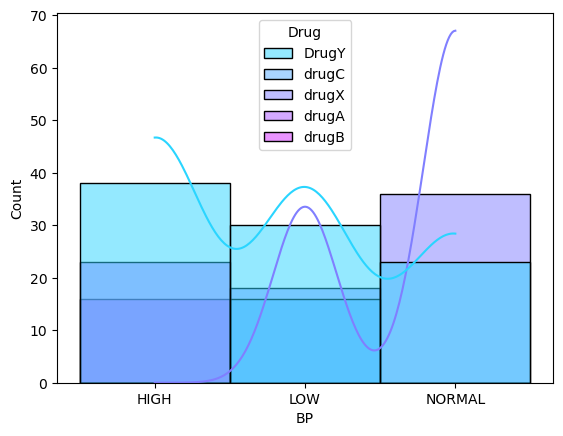

In [17]:
hist_plot('BP')

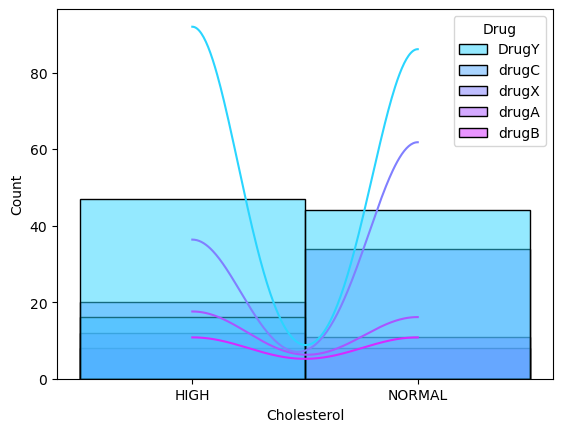

In [18]:
hist_plot('Cholesterol')

In [19]:
list(df.columns)

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

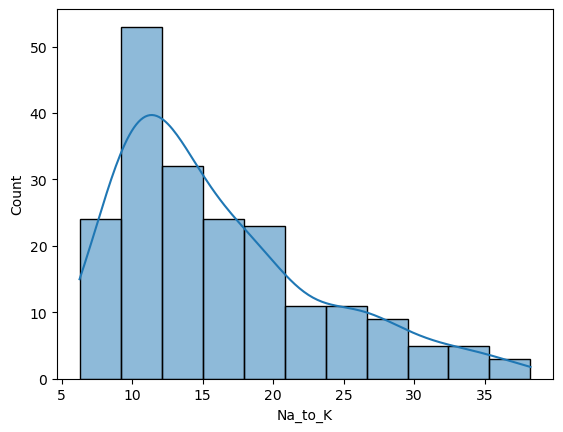

In [20]:
sns.histplot(x=df['Na_to_K'],kde=True)

<AxesSubplot:>

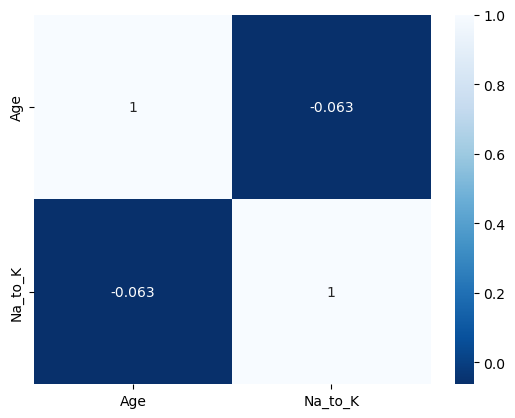

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')

### Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder
string = df.select_dtypes(include='object').columns
le=LabelEncoder()
for c in string:
    df[c]= le.fit_transform(df[c])

In [23]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


## Train/Test

In [33]:
x= df.drop('Drug',axis=1)
y=df['Drug']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20,stratify=y,random_state = 41)

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=5, random_state=45)
rf.fit(xtrain, ytrain)

# prediction
predict = rf.predict(xtest)

# result report
report = classification_report(ytest, predict)

print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.95        40
   macro avg       0.96      0.92      0.93        40
weighted avg       0.96      0.95      0.95        40



## Decision Tree

In [26]:
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'random_state': [0]
}
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3)

grid_search.fit(xtrain, ytrain)

print("Best parameters: ", grid_search.best_params_)

ypred = grid_search.predict(xtest)
accuracy = accuracy_score(ytest, ypred)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [27]:
print('Accuracy:', accuracy)

Accuracy: 0.95


In [28]:
print(classification_report(ytest, ypred))
##True positive aslo call recall
##False Negative

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.95        40
   macro avg       0.96      0.92      0.93        40
weighted avg       0.96      0.95      0.95        40



## Plot ROC curve

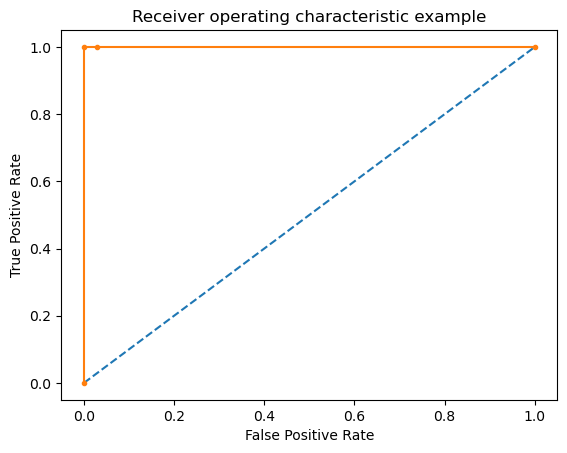

[2.   1.   0.86 0.  ]
[0. 1. 1. 1.]


In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as pyplot

# predict probabilities
yhat = rf.predict_proba(xtest)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# plot no skill/RANDOM roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--')

# calculate roc curve for model
fpr, tpr, thresholds = roc_curve(ytest, pos_probs,pos_label=1) ##i have to know more about pos_label=1

# plot model roc curve
pyplot.plot(fpr, tpr, marker='.')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Receiver operating characteristic example")

# show the plot
pyplot.show()
print(thresholds)
print(tpr)

In [30]:
conf_matrix = confusion_matrix(ytest, predict)
conf_matrix

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

<AxesSubplot:>

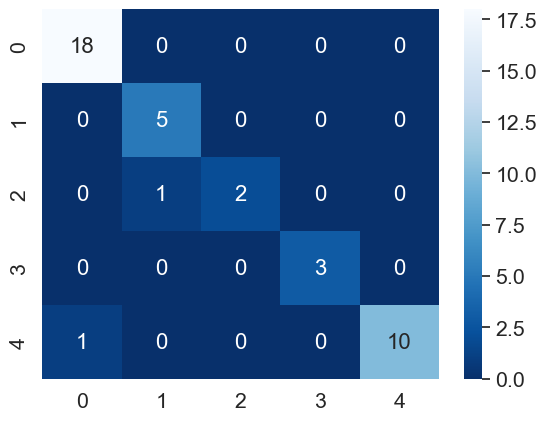

In [31]:
sns.set(font_scale = 1.4)
sns.heatmap(conf_matrix, cmap = 'Blues_r', annot = True, annot_kws = {'size' : 16}, fmt = 'g')

In [33]:
predict

array([4, 0, 1, 4, 4, 0, 0, 3, 0, 4, 0, 0, 1, 4, 4, 0, 0, 0, 3, 0, 4, 0,
       4, 0, 1, 1, 0, 0, 2, 1, 0, 4, 0, 2, 0, 0, 3, 1, 4, 0])